<img src="https://media.istockphoto.com/vectors/graduates-throwing-cap-silhouette-high-achievements-school-student-vector-id1136299611?k=6&m=1136299611&s=612x612&w=0&h=HR4syh_Q6eQAiMn_80w28Mb9JjltjIh6TqlaU7pubIU=" width="550" height="100" style="vertical-align:top">


# <center><font size=6> Clustering U.S. Universities</font> 
<center><font size=3><i>By Cameron Swanson and Marisol Hernandez</i></font></center>  
<center><font size=3><i>10/26/2020</i></font></center>

---

## <font> Table of Contents</font>

[I. Objective](#objective)   
[II. Data Exploration](#data-exploration)   
[III. Data Cleaning](#data-cleaning)  
[IV. Adaptation](#adaptation)  
[V. Descriptive Visualization](#visualizations)  
[VI. Step by step Hierarchical clustering](#hcluster)  
[VII. Dendrogram](#dendrogram)  
[VIII. Step by step K means](#step)  
[IX. sklearn.cluster](#cluster)  
[X. kNN Function](#kNN)  
[XI. Project Report](#report)  
[XII. Originality](#originality)


## Objective of the Proposed Research <a id='objective'></a>
---

For many, college is an important transformational period in their lives.  Students will typically enter as adolescents and transition into adulthood during their undergraduate career.  During these four years, students will learn more about themselves, meet new people, and pursue their passions as they learn to live on their own for the first time.  While it can be stressful at times, many students find the experience rewarding.

For high school seniors, the process of choosing where to apply can be quite daunting -- many factors such as school size, location, culture, and available majors come into play, to say nothing of required test scores and GPA.  In light of this, the San Francisco County Office of Education has come to us for assistance in finding ways to make this decision easier for prospective applicants.

To this end, we've found a dataset of all U.S. universities, which contains various statistics from the 2013-14 application period, including *location, undergraduate enrollment, tuition, standardized test scores, and graduation rate.*  Our goal is to use this information to cluster these universities into groups with **similar accepted SAT component scores**, so as to give more in-depth recommendations of colleges to high school seniors.

In addition to the information already in our dataset, we will also calculate the __total SAT score__ and __total graduating students__ of each university to assist in our research.


## Data Exploration <a id='data-exploration'></a>
---

In [21]:
# Import libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics.pairwise import euclidean_distances

# Set options for displaying pandas dataframes
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

We can see that each instance represents __a single university's stats for the 2013-14 academic year.__  Our features include __location coordinates, SAT scores, in-state and out-of-state tuition, and undergraduate enrollment,__ among other metrics.

We can also see __many missing values__ across our features -- we'll need to address this when cleaning our dataset.

In [4]:
education = pd.read_csv('education.csv')
education.head(10)

Name  Longitude location of institution  \
0             Alabama A & M University                         -86.568502   
1  University of Alabama at Birmingham                         -86.809170   
2                   Amridge University                         -86.174010   
3  University of Alabama in Huntsville                         -86.638420   
4             Alabama State University                         -86.295677   
5            The University of Alabama                         -87.545766   
6              Athens State University                         -86.965140   
7      Auburn University at Montgomery                         -86.177351   
8                    Auburn University                         -85.492409   
9          Birmingham Southern College                         -86.853636   

   Latitude location of institution  \
0                         34.783368   
1                         33.502230   
2                         32.362609   
3                         34.722818   
4                         32.364317   
5                         33.214400   
6                         34.805625   
7                         32.369939   
8                         32.600201   
9                         33.515453   

   SAT Critical Reading 75th percentile score  SAT Math 75th percentile score  \
0                                       450.0                           450.0   
1                                       640.0                           650.0   
2                                         NaN                             NaN   
3                                       640.0                           650.0   
4                                       480.0                           480.0   
5                                       620.0                           640.0   
6                                         NaN                             NaN   
7                                         NaN                             NaN   
8                                       620.0                           650.0   
9                                       630.0                           640.0   

   SAT Writing 75th percentile score  ACT Composite 75th percentile score  \
0                                NaN                                 19.0   
1                                NaN                                 28.0   
2                                NaN                                  NaN   
3                                NaN                                 29.0   
4                                NaN                                 19.0   
5                              600.0                                 30.0   
6                                NaN                                  NaN   
7                                NaN                                 23.0   
8                              620.0                                 30.0   
9                                NaN                                 29.0   

   Percent admitted - total  Tuition and fees, 2013-14  \
0                      90.0                     7182.0   
1                      87.0                     7206.0   
2                       NaN                     6870.0   
3                      81.0                     9192.0   
4                      51.0                     8720.0   
5                      57.0                     9450.0   
6                       NaN                        NaN   
7                      84.0                     8750.0   
8                      83.0                     9852.0   
9                      64.0                    30690.0   

   Total price for in-state students living on campus 2013-14  \
0                                            21849.0            
1                                            22495.0            
2                                                NaN            
3                                            23466.0            
4                                            18286.0

Our dimensions printout shows us that we have __1534 universities__ in our dataset, with __15 different features__ for each school.

In [5]:
education.shape

(1534, 16)

The `info()` printout shows us the data types of each features, as well as a count of non-null values in each column.

We see that most of our features contain __floats__, while two of them contain __strings.__  We can also see that __all but 4 features contain missing values,__ as they have a non-null count less than our row total of 1534.

In [6]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   Longitude location of institution                               1534 non-null   float64
 2   Latitude location of institution                                1534 non-null   float64
 3   SAT Critical Reading 75th percentile score                      1169 non-null   float64
 4   SAT Math 75th percentile score                                  1182 non-null   float64
 5   SAT Writing 75th percentile score                               714 non-null    float64
 6   ACT Composite 75th percentile score                             1199 non-null   float64
 7   Percent admitted - total                           

Our `describe()` printout indicates shows us summary statistics of all our numeric columns.  

We can see that our __75th percentile__ of undergraduate enrollment is __6394,__ while our maximum enrollment is __51,333.__  This means we may have several outliers at the top end of this distribution, and that we have __more smaller schools__ in our dataset than larger ones.

__Values of zero__ are present in columns such as __undergraduate enrollment, graduation rate, enrolled total, and total applicants.__  These seem erroneous -- it may be reasonable to remove universities with these values from our dataset.

In [8]:
education.describe().T

count          mean  \
Longitude location of institution                   1534.0    -88.342338   
Latitude location of institution                    1534.0     38.729993   
SAT Critical Reading 75th percentile score          1169.0    578.297690   
SAT Math 75th percentile score                      1182.0    588.311337   
SAT Writing 75th percentile score                    714.0    576.550420   
ACT Composite 75th percentile score                 1199.0     25.572143   
Percent admitted - total                            1376.0     64.569767   
Tuition and fees, 2013-14                           1497.0  20727.490314   
Total price for in-state students living on cam...  1400.0  34935.306429   
Total price for out-of-state students living on...  1400.0  38767.612857   
Undergraduate enrollment                            1532.0   5532.885117   
Graduation rate - Bachelor degree within 4 year...  1476.0     37.450542   
Enrolled total                                      1377.0   1043.046478   
Applicants total                                    1377.0   6391.193174   

                                                             std          min  \
Longitude location of institution                      14.838804  -158.062444   
Latitude location of institution                        4.832832    19.701854   
SAT Critical Reading 75th percentile score             70.169391   360.000000   
SAT Math 75th percentile score                         71.871189   410.000000   
SAT Writing 75th percentile score                      78.899075   360.000000   
ACT Composite 75th percentile score                     3.375932    14.000000   
Percent admitted - total                               18.710062     6.000000   
Tuition and fees, 2013-14                           12455.805360  1032.000000   
Total price for in-state students living on cam...  13283.049319  9768.000000   
Total price for out-of-state students living on...  10716.524007  9768.000000   
Undergraduate enrollment                             7242.649546     0.000000   
Graduation rate - Bachelor degree within 4 year...     21.949856     0.000000   
Enrolled total                                       1285.165519     0.000000   
Applicants total                                     8787.469171     0.000000   

                                                             25%  \
Longitude location of institution                     -94.576342   
Latitude location of institution                       35.348340   
SAT Critical Reading 75th percentile score            530.000000   
SAT Math 75th percentile score                        540.000000   
SAT Writing 75th percentile score                     520.000000   
ACT Composite 75th percentile score                    23.000000   
Percent admitted - total                               54.000000   
Tuition and fees, 2013-14                            8542.000000   
Total price for in-state students living on cam...  22487.000000   
Total price for out-of-state students living on...  31128.000000   
Undergraduate enrollment                             1328.000000   
Graduation rate - Bachelor degree within 4 year...     20.000000   
Enrolled total                                        287.000000   
Applicants total                                     1488.000000   

                                                             50%  \
Longitude location of institution                     -84.514218   
Latitude location of institution                       39.946096   
SAT Critical Reading 75th percentile score            570.000000   
SAT Math 75th percentile score                        580.000000   
SAT Writing 75th percentile score                     566.500000   
ACT Composite 75th percentile score                    25.000000   
Percent admitted - total                               67.000000   
Tuition and fees, 2013-14                           20060.000000   
Total price for in-state students living on cam...  34115.00000

## Data Cleaning <a id='data-cleaning'></a>
---

#### Check for Missing Values
From above we can see that our dataframe contains a significant amount of missing values across multiple columns. Because we do not want to lose too much of our data, we decided clean our data over the columns pertaining to our clustering. Running the following code returns the total number of missing values of the columns pertaining to SAT scores.

In [7]:
education.iloc[:,3:6].isnull().sum()

SAT Critical Reading 75th percentile score    365
SAT Math 75th percentile score                352
SAT Writing 75th percentile score             820
dtype: int64

#### Remove Missing Values

Now we intend to remove the rows that contain missing values over the columns pertaining to SAT scores. To do so, we ran `.dropna()` on our `education` dataframe, specifiying to columns with the `subset` parameter.

In [8]:
education = education.dropna(axis=0, subset=["SAT Critical Reading 75th percentile score",
                            "SAT Math 75th percentile score", "SAT Writing 75th percentile score"]).copy()

This leaves us with a **705 by 16** dataframe indicated below.

In [9]:
education.shape

(705, 16)

## Adaptation <a id='adaptation'></a>
---

In the next section, we wanted to develop some plots built off of the university's <ins>total SAT score</ins> benchmark. To do so, we first had to create a `Total SAT Score` column which is the total of the 3 SAT components.

In [10]:
education['Total SAT Score'] = education.iloc[:,3] + education.iloc[:,4] + education.iloc[:,5]

Additionally, we wanted to develop some plots built off ot the university's <ins> total graduating students </ins>. To find this figure, we built a `Total Graduating Students` column off of the `Undergraduate enrollment` and `Graduation rate - Bachelor degree within 4 years, total` columns.

In [11]:
education['Total Graduating Students'] = ((education['Graduation rate - Bachelor degree within 4 years, total'])/100) * education['Undergraduate enrollment'] 

Using `.columns` we can verify that the new column was made under our data frame.

In [12]:
education.columns

Index(['Name', 'Longitude location of institution',
       'Latitude location of institution',
       'SAT Critical Reading 75th percentile score',
       'SAT Math 75th percentile score', 'SAT Writing 75th percentile score',
       'ACT Composite 75th percentile score', 'Percent admitted - total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Control of institution', 'Undergraduate enrollment',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Enrolled total', 'Applicants total', 'Total SAT Score',
       'Total Graduating Students'],
      dtype='object')

## Descriptive Visualization <a id='visualizations'></a>
---

### Map Plot

Our first visualization is a __map plot__ depciting the geographic location of all universities in our dataset.  __Public__ universities are shown in __blue__, while __private__ universities are shown in __red.__  By hovering over any point, we can see the name of each university, along with its location coordinates and total graduating students.

In [13]:
# Create a new data frame with the necessary columns for our map plot
map_vis = education[['Name', 'Longitude location of institution', 'Latitude location of institution', 
                    'Total Graduating Students', 'Control of institution']].copy()

# Make a new 'Control of institution' column for color mapping
map_vis['Public or Private'] = map_vis['Control of institution']

# Create color map dictionary -- blue for public, red for private
pub_priv = {'Public': '#0000FF', 'Private not-for-profit': '#FF0000'}

# Map color values on our newly created column
map_vis['Public or Private'] = map_vis['Public or Private'].map(pub_priv)

In [14]:
def map():
    fig = go.Figure()
    
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = map_vis['Longitude location of institution'], 
        lat = map_vis['Latitude location of institution'], marker = dict(color = map_vis['Public or Private']),
        hovertext = map_vis['Name'] + '<br>' + map_vis['Total Graduating Students'].astype(str), name = 'Public'))
    
    fig.update_layout( title_text = 'U.S. Universities by Control Type and Total Graduating Students (2013-14)', 
                      showlegend = True, geo = dict(scope = 'usa', projection_type = 'albers usa',
                                                    landcolor = 'rgb(217, 217, 217)'))
    fig.show()
    
map()

### 3D Scatter Plot

For our second visualization, we wanted to create a 3D scatterplot where each point represents the SAT scores 75th percentile for each university. Using the `plotly` library, we created an interactive scatterplot that enables users to hover over each point to view the SAT components for each school.

In [15]:
def scatter3D():
    fig = go.Figure(data=[go.Scatter3d(x=education["SAT Critical Reading 75th percentile score"], 
                                       y=education["SAT Math 75th percentile score"], 
                                       z=education["SAT Writing 75th percentile score"], mode='markers', 
                                       text=education["Name"])])
    
    fig.update_layout(title='U.S. Universities by SAT Component Scores, 2013-14', title_font_size=25,
                      scene = dict(xaxis_title="SAT Critical Reading Score", yaxis_title="SAT Math Score",
                                   zaxis_title="SAT Writing Score"), width=1000)
    fig.show()
    
scatter3D()

### Pie Chart
We wanted to make sure we have a fair distribution of data from both controls. Using a pie chart on our `education` dataset, we can see that *64.0%* of our data comes from private universities, while *36.0%* comes from public universities.

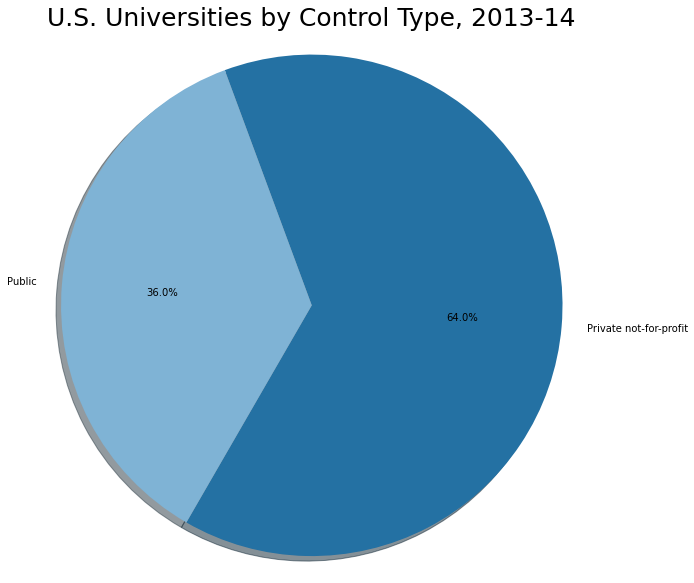

In [16]:
data = {"Control of Institution":list(education["Control of institution"].value_counts().index),
       "Count":list(education["Control of institution"].value_counts())}
df = pd.DataFrame(data)

def pie():
    fig = plt.figure(figsize =(10, 10)) 
    
    control = df["Control of Institution"]
    count = df["Count"]
    colors = ("#2471A3","#7FB3D5")
    
    plt.pie(count, labels=control, autopct='%1.1f%%', shadow=True, startangle=240, colors=colors)
    plt.axis('equal')
    plt.title('U.S. Universities by Control Type, 2013-14', fontdict = {'fontsize': 25})
    plt.show()
    
pie()

### Violin Plot
Using the `education` dataset one more time, we created a violin plot that displays the distibution of the total SAT score benchmark for both public and private universities. Our plot also enables users to hover over the data points and retrieve the tuition data for each university.

In [17]:
def violin():
    fig = go.Figure()
    
    control = list(education["Control of institution"].value_counts().index)
    
    df = px.data.tips()
    fig = px.violin(education, y="Total SAT Score", x="Control of institution", color="Control of institution", 
                    box=True, points="all",hover_data=education.iloc[:,[0,16]])
    fig.show()
violin()

## Step-by-Step Hierarchical Clustering <a id='hcluster'></a>
---
For the first step in our cluster analysis, we will perform __hierarchical clustering__ on our dataset, so that we may determine an appropriate __number of clusters__ to use going forward.  We will do this manually first, before we use the `linkage()` function from `scipy` to do it automatically.  To begin, we need to create a __distance matrix__ for all the points in our dataset.  We'll also need to define some __functions__ to make each iteration a little simpler in terms of code.  We'll do this below -- please see the comments for details on implementation.

In [28]:
# Create distance matrix using 'euclidean_distances' function
education_distance = DataFrame(euclidean_distances(education[['SAT Critical Reading 75th percentile score',
                                                              'SAT Math 75th percentile score',
                                                              'SAT Writing 75th percentile score']]))
# Set entries to floats, to allow for NaN masking
education_distance = education_distance.astype('float')
# Replace zeroes in diagonals with NaN -- makes finding minimums easier (avoids nested for loop)
np.fill_diagonal(education_distance.values, np.NaN)


# Function to obtain row and column indices of first occurrence of value in dataframe (takes dataframe and numeric entry value)
def get_index(frame, value):
    # Initialize empty list to return
    indices = []
    # Create Boolean dataframe ('true' where value exists)
    bool_frame = frame.isin([value])
    # Return series of Booleans with column indices ('true' if value exists in column)
    col_list = bool_frame.any()
    # Grab column indices where value exists
    col_inds = list(col_list[col_list == True].index)
    # Iterate over columns
    for col in col_inds:
        # For each column, obtain Boolean series with row indices ('true' where value exists)
        rows = list(bool_frame[col][bool_frame[col] == True].index)
        # Iterate over rows
        for row in rows:
            # For each row, append row and columns indices to list (value exists on these indices)
            indices.append((row,col))
    return indices

# Function to obtain distances to each point when obtaining new clusters (to append to distance matrix)
def get_cluster(c1, c2):
    # Intitalize empty list to return
    cl_distances = []
    # Iterate over matrix columns
    for col in education_distance:
        # Ignore columns of the two points that are clustering
        if (col == c1) or (col == c2):
            continue
        # Define the two column entries corresponding to the row indices of the points being clustered
        val1 = education_distance.loc[col][c1]
        val2 = education_distance.loc[col][c2]
        # Append the minimum distance to list
        cl_distances.append(np.min([val1,val2]))
    return cl_distances

# Define integer that increases with each iteration, used to define new clusters in matrix
clust_iter = education_distance.shape[0]

# Intialize empty linkage matrix
link_mat = []

# Initialize empty dictionary, and add value of 1 for each point
# This will be used to keep track of the amount of original data points in each new cluster
clust_dict = {}
for i in range(education_distance.shape[0]):
    clust_dict[i] = 1

Now that we have our functions, and all necessary objects have been created, we can begin our iterative process for __hierarchical clustering.__  The basic idea involves finding the __two points__ in our dataset that are closest together, clustering them, and redefining the distances between the new cluster and all other points.  This process repeats until we have one large cluster that contains our entire dataset.  

This process is outlined below, and will ultimately produce a __linkage matrix__ which we can use to plot a dendrogram.  Once again, please see the comments below for details on implementation.

In [29]:
while education_distance.shape[0] > 1:
    # Define minimum value over the entire matrix
    min_dist = min(education_distance.min())

    # Get row and column indices where first occurrence of minimum value exists
    clust_inds = get_index(education_distance, np.nanmin(min_dist))[0]
    
    # Obtain list of distance values to be appended as new cluster
    new_cluster = get_cluster(clust_inds[0],clust_inds[1])
    
    # Drop rows and columns of points being clustered
    education_distance = education_distance.drop([clust_inds[0],clust_inds[1]]).drop([clust_inds[0],clust_inds[1]],axis=1)

    # Add new distances as a column in matrix
    education_distance[clust_iter] = np.array(new_cluster)
    
    # Append NaN to new distances list, and add as a row in matrix 
    # Ensures symmetry in new matrix, with NaNs down the diagonal
    new_cluster.append(np.NaN)
    education_distance.loc[clust_iter] = np.array(new_cluster)
    
    # Add new entry to dictionary for new cluster -- value is the sum the points in the two original clusters
    clust_dict[clust_iter] = clust_dict[clust_inds[0]] + clust_dict[clust_inds[1]]
    
    # Create list of indices of points being clustered, the distance between them, and the sum of original points in new cluster
    link = [clust_inds[0], clust_inds[1], np.nanmin(min_dist), clust_dict[clust_iter]]
    
    # Append this to linkage matrix and advance numeric iterator forward (for next cluster)
    link_mat.append(link)
    clust_iter += 1
    
    # Ensure all column names are integers (new column name is a string by default)
    education_distance.columns = education_distance.columns.astype(int)

# When finished, converge linkage matrix to an array (to be used with dendrogram() function)
link_mat = np.asarray(link_mat)

np.set_printoptions(suppress=True)
link_mat

array([[ 440.        ,    0.        ,    0.        ,    2.        ],
       [ 452.        ,    1.        ,    0.        ,    2.        ],
       [ 287.        ,    2.        ,    0.        ,    2.        ],
       ...,
       [1405.        ,  577.        ,   59.9666574 ,  702.        ],
       [1406.        ,  298.        ,   65.57438524,  703.        ],
       [1407.        , 1400.        ,   78.94935085,  705.        ]])

Our above __linkage matrix__ printout details the order in which our points were clustered, along with the minimum distance in each iteration, as well as the total number of original points in each new cluster.  We can see that our last entry in the matrix is __705,__ indicating that the last cluster (that includes the entire dataset) includes 705 points -- we know this is correct since this is indeed the size of our dataset.

Because we decided we wanted to cluster universities based on SAT Math, Reading, and Writing scores, we created a subset called `SAT` that contains the columns pertaining to these scores. In addition, we set the index to the `Name` of the universities.

In [30]:
SAT = education.iloc[:,[0,3,4,5]].copy()
SAT = SAT.set_index("Name")

Our next step is to __plot a dendrogram__ using the linkage matrix we created.  We can do this like so:

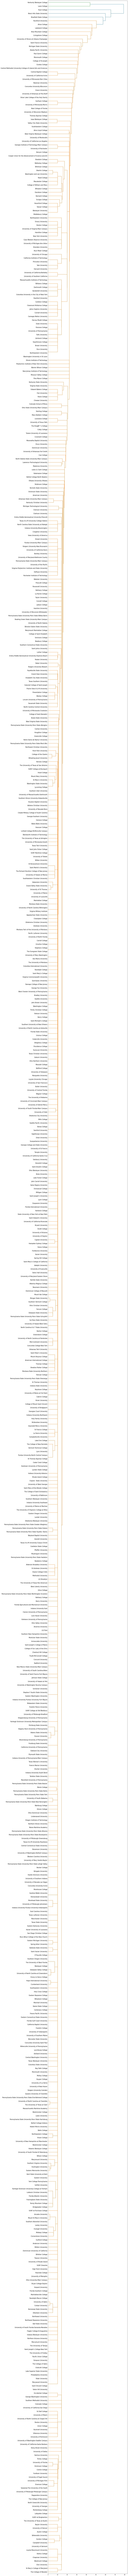

In [31]:
figure(figsize=(15, 500))
D = dendrogram(link_mat, orientation="right", leaf_font_size=15, labels = SAT.index)

Based on the above __color scheme__ of our dendrogram, $k=3$, which represents the __number of clusters__ we should use throughout our analysis.  However, we can see that some of the determined clusters might be questionable, as the __green cluster__ at the top of our printout only includes two schools, and the __blue cluster__ next to it only includes three.  Since this was implemented manually, our process may be missing some more subtle details, and may not be as accurate as the `linkage()` function.  Furthermore, this implementation used the "single linkage" method to determine our clusters -- it may be more reasonable to use the "average" or "complete" linkage method to achieve the clusters we want.

Before moving onto the next step, let's compare this result to a dendrogram created using the `linkage()` function.

## Dendrogram using `linkage` <a id='dendrogram'></a>
---

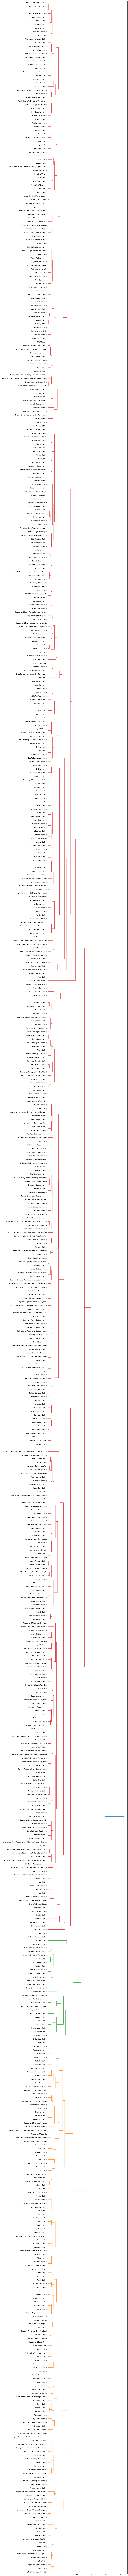

In [27]:
figure(figsize=(15, 500))
D = dendrogram(linkage(SAT, 'average'), orientation="right", leaf_font_size=15, labels = SAT.index)

## Step-by-step K-means <a id='step'></a>
---

### Random Centroids
Now that we know $k = 3$, we wanted to establish 3 random centroids. To begin, we made a copy of our `SAT` dataframe.

In [32]:
step = SAT.copy()

Next, we established 3 random centroids.

In [33]:
step.loc['Centroid 1'] = [750, 750, 750]
step.loc['Centroid 2'] = [450, 450, 450]
step.loc['Centroid 3'] = [600, 550, 600]

To make it easier to identify our centroids in our plot, we wanted to designate a different color for each. The following code specifies that 705 of our original data points will be grey while our 3 centroids will each be a different color.

In [34]:
c = np.concatenate((np.repeat("grey", 705), np.array(["fuchsia","navy","yellow"])))

Plotting the data of our new copy into a 3D scatter plot, we can now see where each of our centroids lie.

In [55]:
def random():
    fig = go.Figure(data=[go.Scatter3d(x=step["SAT Critical Reading 75th percentile score"], 
                        y=step["SAT Math 75th percentile score"], z=step["SAT Writing 75th percentile score"], 
                        mode='markers', marker=dict(color=c, size=np.concatenate((np.repeat(17,705), 
                        np.array([35,35,35])))), text=step.index)])
    
    fig.update_layout(scene = dict(xaxis_title="SAT Critical Reading Score", yaxis_title="SAT Math Score",
                                   zaxis_title="SAT Writing Score"), width=1000, margin=dict(r=30, b=10, l=10, t=10))
    fig.show()

random()

### Clustering Algorithm
To cluster our universities, we created a function called `kmeans()` that takes in a dataframe `df` and `k`, number of means, as parameters and returns the clusters created. Our function actually creates clusters manually without the support of any external libraries.

In [36]:
def kmeans(df,k):
    test = df.copy()
    
    for i in range(1,k+1):
        test.loc['Centroid '+str(i)] =  np.random.randint(0,801,3)
        
    test["Association"] = ""
    
    j = 1
    
    while j < 50:
        for i in range(1,k+1):
            test[str(i)] = np.sqrt((test.iloc[:,0] - test.loc['Centroid '+str(i)][0])**2
                                   + (test.iloc[:,1] - test.loc['Centroid '+str(i)][1])**2
                                   + (test.iloc[:,2] - test.loc['Centroid '+str(i)][2])**2)
            
        test["Association"] = pd.to_numeric(test.iloc[:,4:].idxmin(axis = 1))
        
        for i in range(1,k+1):
            test.loc['Centroid '+str(i)] = test[test.Association == i].iloc[0:39,0:3].mean()
            
        for i in range(1, k+1):
            test.loc['Centroid '+str(i)]["Association"] = i
        
        j = j + 1
            
    fig = go.Figure(data=[go.Scatter3d(x=test.iloc[:,0], y=test.iloc[:,1], z=test.iloc[:,2], mode='markers', 
                          marker=dict(color=test["Association"], size=np.concatenate((np.repeat(17,705), 
                          np.repeat(35,k)))), text=test.index)])
    
    fig.update_layout(scene = dict(
        xaxis_title="SAT Critical Reading Score",
        yaxis_title="SAT Math Score",
        zaxis_title="SAT Writing Score"),
                      width=1000,
                      margin=dict(r=30, b=10, l=10, t=10))
    fig.show()

Running the function on our `SAT` dataframe and specifying $k = 3$ returns the following clusters.

In [40]:
kmeans(SAT,3)

<ipython-input-36-b7848bf620b9>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## sklearn.cluster <a id='cluster'></a>
In this next section, we wanted to run another unsupervised k-means cluster, but this time using the `sklearn.cluster` library. With the function `KMeans()`, we specified that we want the data of our model to be divided into **3 clusters**. Running the `.fit()` method on our `SAT` dataframe indicates the creation of the clusters.

In [58]:
# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(SAT)

KMeans(n_clusters=3)

### Plotting Clusters with k = 3
Now we were able to plot our clusters by defining the color of our points to be equal to `model.labels_`, an array of the associated clusters.

In [59]:
def k_means_cluster():
    fig = go.Figure(data=[go.Scatter3d(x=SAT.iloc[:,0], y=SAT.iloc[:,1], z=SAT.iloc[:,2], mode='markers', 
                                   marker=dict(color=model.labels_), text=SAT.index)])
    
    fig.update_layout(scene = dict( xaxis_title="SAT Critical Reading Score", yaxis_title="SAT Math Score",
                                   zaxis_title="SAT Writing Score"), width=1000, margin=dict(r=30, b=10, l=10, t=10))
    fig.show()

k_means_cluster()

## kNN Function: <a id='kNN'></a>
Lastly, we wanted to create a function called `predictKNN` that takes in 3 parameters: `k` number of neighbors, a `vector`, and a dataframe `df`. Running the function returns the classification of the `vector` specified.

In [60]:
def predictKNN(k, vector, df):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    knn.fit(df, model.labels_)
    
    cluster = knn.predict(np.array(vector).reshape(1, -1))[0]
    color = ["Blue", "Pink", "Yellow"]
    print('SAT Reading Score:', vector[0], '\nSAT Math Score:', vector[1], '\nSAT Writing Score:', vector[2],
          '\nPrediction: Cluster #', cluster, color[cluster])

The following are 5 different iterations verifying the accuracy of our function.

In [61]:
predictKNN(5, [500,550,500], SAT)

SAT Reading Score: 500 
SAT Math Score: 550 
SAT Writing Score: 500 
Prediction: Cluster # 0 Blue


In [62]:
predictKNN(5, [400,400,400], SAT)

SAT Reading Score: 400 
SAT Math Score: 400 
SAT Writing Score: 400 
Prediction: Cluster # 0 Blue


In [63]:
predictKNN(5, [750,750,750], SAT)

SAT Reading Score: 750 
SAT Math Score: 750 
SAT Writing Score: 750 
Prediction: Cluster # 1 Pink


In [64]:
predictKNN(5, [600,600,600], SAT)

SAT Reading Score: 600 
SAT Math Score: 600 
SAT Writing Score: 600 
Prediction: Cluster # 2 Yellow


In [65]:
predictKNN(5, [400,700,800], SAT)

SAT Reading Score: 400 
SAT Math Score: 700 
SAT Writing Score: 800 
Prediction: Cluster # 2 Yellow


## Project Report <a id='report'></a>
---

### Introduction
The college application process can be daunting -- while there's much to be said about getting letters of recommendation and writing personal statements, but for many, the stress sets in when simply deciding where to apply.  For many students, this is their first opportunity to live on their own, meet new people, and find their passion.  Many factors come into play when making this decision, including school size, location, culture, and of course, standardized test scores.  In light of this, the San Francisco County Office of Education has asked us for assistance in making this decision easier for high school seniors looking to apply.  The goal of our investigation is to cluster schools by similarity with respect to __SAT component scores,__ and create a recommendation engine that suggests colleges to students based on their scores.  We believe this will be a great asset to high school counselors and students when it comes to the application process.

### Data Collection & Exploratory Data Analysis
To assist in our research, we've been provided a dataset from the _Integrated Postsecondary Education Data System_ (IPEDS), part of the _National Center for Education Statistics._  Our dataset contains information on 1534 U.S. universities, each described by 15 features (initially narrowed down from 145), including location coordinates, SAT component scores, undergraduate enrollment, graduation rate, and in-state and out-of-state tuition, all taken during the 2013-14 academic year.  We found that almost all of our columns were numeric, with the exception of control type, which was categorical (public vs. private).  Additionally, we found quite a few missing values in our data, which we would need to address during data cleaning.

### Data Cleaning & Adaptation
In order to ensure data quality and information reliability, our next step was to clean our dataset.  The missing values in our dataset varied significantly between schools, so in order to keep as much data as possible, we focused on removing schools that were missing __SAT test scores,__ as these features were key to our analysis.  Doing so left us with __705 schools__ in total.  Additionally, we created additional columns to use for data visualization -- one such column was for __total SAT score,__ and another was for __total graduating students.__  

### Descriptive Visualizations
Before beginning our cluster analysis, we elected to make some visualizations of our data.  Our first visualization was a __map plot__ to visualize all of our schools by location, and separated them by __control type.__  __Public schools__ were shown in __blue,__ while __private schools__ were shown in __red.__  Hovering over points will show the university's __name, location coordinates, and total graduating students.__

In [ ]:
map()

Our next visualization was a __3D scatter plot__, depicting each university by the 75th percentile of their __three SAT component scores.__  Once again, hovering over each point shows the university's name and SAT component scores.  Naturally, we see Ivy Leagues and similar schools at the top end of our distribution, while there are relatively unknown scores towards the bottom.

In [ ]:
scatter3D()

Our third visualization was a __pie chart__ separating our data by __control type__ -- we wanted to see fair representation between both types of universities, to ensure that our recommendation engine could reliably suggest both types of schools.

In [ ]:
pie()

Our last visualization was a __violin plot__ that showed the distribution of __accepted total SAT scores by control type.__  Our output indicated a __wider distribution__ of accepted scores for private universities when compared with public universities.  Again, hovering over each point shows the university's name and total SAT score.

In [ ]:
violin()

### Step-by-Step Hierarchical Clustering
With our visualizations done, we could finally begin our cluster analysis.  Our first step was to perform __hierarchical clustering__ on our data, in order to determine an appropriate __number of clusters__ for our analysis.  To do this, we grouped individual schools together based on __similarity,__ then grouping clusters together until we obtained one cluster that included all of our schools.  The order in which the schools were clustered gives us information on similarity between universities, as well as which schools would likely be clustered together.  For our clustering, similarity was determined by a university's __three SAT component scores.__

### Dendrogram
Our next step was to visually plot the results of our hierarchical clustering process.  To do this we created a *dendrogram* which demonstrates the hierarchical relationship between our universities. In other words, the dendrogram groups the universities in a way where universities in the same cluster are more similar than universities in other clusters. The dendrogram can also help users determine the number of clusters created by color coding each cluster. Based on the color scheme, we determined that our data is composed of **3 clusters**. Knowing this, we were now able to implement other clustering methods that enable us to view our clusters in a 3-dimensional space.

### Step-by-step K-means
K-means clustering is one of the simplest and most popular unsupervised clustering algorithms. The objective of K-means clustering is pretty straight forward — group data points into a fixed number of clusters based on similarities. To achieve this, we defined a target number $k = 3$, which represents the number of centroids in our dataset. A centroid is a point that represents the center of a cluster. Before running our K-means algorithm, we established and plotted $3$ random centroids as seen below.

In [ ]:
random()

The K-means algorithm then works iteratively to assign each data point to the nearest cluster until the positions of the centroids are optimized. If you hover over the data points and find each centroid, you can see that they now lie at the center of each cluster.

In [ ]:
kmeans(SAT,3)

### sklearn.cluster
In the preceding section, we built our Step-by-step K-means algorithm manually without the assistance of any external libraries. If you refer back to the [Step by step K means](#step) section in our notebook, you can actually see that our function `kMeans()` establishes $k$ random centroids and iteratively calculates the distance between each point and each centroid, finding the minimum distance and associating each point with the closest centroid until the positions of the centroids are optimized. The `sklearn.cluster` library, however, includes a built-in function called `KMeans()` that does all of this automatically. Utilizing the library resulted in the following clusters.

In [ ]:
k_means_cluster()

We can actually conclude that our Step-by-step K-means algorithm actually wasn't too far off.

### kNN Function
The last step of our investigation was to establish a function `predictKNN()` that could return the classification of any data point. This could benefit the San Francisco County Office of Education in two different scenarios. The first scenario could perhaps be the case where they receive the accepted SAT components of a university that was not part of the original database and wanted to see which cluster it belonged to. In this case, they could run the function with the specified parameters and see which cluster it recommends. Another scenario would be the case where they receive a student's SAT components and they want to see which schools they would have the best chance getting accepted to. In this case, they could run the function with the specified parameters and see which cluster they fall into. The cluster they fall into and any cluster below would be the schools they should consider applying to.


### Conclusion
When assisting high school seniors during their college application process, the San Francisco County Office of Education might want to have a better understanding of the accepted SAT component scores across all U.S. universities so that they can give more in-depth recommendations of schools for their students to apply to. In our study, we used cluster analysis to provide this understanding. With the use of hierarchical clustering, K-means and K-Nearest Neighbors, we grouped universities based on *similarities* in their **accepted SAT component scores**. In addition, we built a recommendation engine that can return the classification of any data point. This provides tremendous support when assisting students in their college application process because the clusters can help them determine which schools they will most likely get accepted to by providing their own SAT scores and seeing which cluster they lie in.

## Originality <a id='originality'></a>
---
Cluster analysis is a very common machine learning algorithm that can be applied across a variety of sectors. We knew from the very beginning that we wanted to determine a case study related to the theme of education, but something that has never been seen before. To verify that there were no other similar published works, we looked at notebooks that were created using the same dataset. We found one [notebook](https://www.kaggle.com/devisangeetha/find-your-university-in-us-with-leaflet-viz) where the author conducted a cluster analysis, but for the purpose of clustering universities by geography instead. We also found another [notebook](https://www.kaggle.com/sumithbhongale/notebook4186f97a6b) where the author conducted linear regression, but for the purpose of predicting values of continuous variables. Aside from these published works, we have not found any study similar to ours using the same dataset.